<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,21.914307,78.692092,-0.000227,110.606173,110.606568,-0.000395
1,0.0,1.0,23.655280,38.661471,-0.005164,72.311587,72.315167,-0.003579
2,0.0,2.0,75.305039,35.502251,0.003407,120.810697,120.805186,0.005511
3,0.0,3.0,39.723233,46.575209,0.005606,96.304048,96.297082,0.006965
4,0.0,4.0,97.970503,62.734175,-0.006736,170.697941,170.703589,-0.005647
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,29.284031,26.358186,-0.012635,65.629582,65.635335,-0.005753
59996,999.0,56.0,25.454835,50.613200,-0.003961,86.064074,86.064255,-0.000181
59997,999.0,57.0,69.827055,77.978087,0.001162,157.806304,157.806286,0.000017
59998,999.0,58.0,46.477273,20.987904,-0.029648,77.435529,77.458086,-0.022557


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,21.914307,78.692092,-0.000227,110.606173,110.606568,-0.000395
1,0.0,1.0,23.655280,38.661471,-0.005164,72.311587,72.315167,-0.003579
2,0.0,2.0,75.305039,35.502251,0.003407,120.810697,120.805186,0.005511
3,0.0,3.0,39.723233,46.575209,0.005606,96.304048,96.297082,0.006965
4,0.0,4.0,97.970503,62.734175,-0.006736,170.697941,170.703589,-0.005647
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,29.284031,26.358186,-0.012635,65.629582,65.635335,-0.005753
59996,999.0,56.0,25.454835,50.613200,-0.003961,86.064074,86.064255,-0.000181
59997,999.0,57.0,69.827055,77.978087,0.001162,157.806304,157.806286,0.000017
59998,999.0,58.0,46.477273,20.987904,-0.029648,77.435529,77.458086,-0.022557


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    21.914307  78.692092 -0.000227  110.606173  110.606568 -0.000395
      1.0    23.655280  38.661471 -0.005164   72.311587   72.315167 -0.003579
      2.0    75.305039  35.502251  0.003407  120.810697  120.805186  0.005511
      3.0    39.723233  46.575209  0.005606   96.304048   96.297082  0.006965
      4.0    97.970503  62.734175 -0.006736  170.697941  170.703589 -0.005647
...                ...        ...       ...         ...         ...       ...
999.0 55.0   29.284031  26.358186 -0.012635   65.629582   65.635335 -0.005753
      56.0   25.454835  50.613200 -0.003961   86.064074   86.064255 -0.000181
      57.0   69.827055  77.978087  0.001162  157.806304  157.806286  0.000017
      58.0   46.477273  20.987904 -0.029648   77.435529   77.458086 -0.022557
      59.0   55.699283  61.292498  0.002630  126.994411  126.990301  0.004110

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    21.914307  78.692092 -0.000227  110.606173  110.606568 -0.000395
      1.0    23.655280  38.661471 -0.005164   72.311587   72.315167 -0.003579
      2.0    75.305039  35.502251  0.003407  120.810697  120.805186  0.005511
      3.0    39.723233  46.575209  0.005606   96.304048   96.297082  0.006965
      4.0    97.970503  62.734175 -0.006736  170.697941  170.703589 -0.005647
...                ...        ...       ...         ...         ...       ...
999.0 55.0   29.284031  26.358186 -0.012635   65.629582   65.635335 -0.005753
      56.0   25.454835  50.613200 -0.003961   86.064074   86.064255 -0.000181
      57.0   69.827055  77.978087  0.001162  157.806304  157.806286  0.000017
      58.0   46.477273  20.987904 -0.029648   77.435529   77.458086 -0.022557
      59.0   55.699283  61.292498  0.002630  126.994411  126.990301  0.004110

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,21.914307,78.692092,-0.000227,110.606173,110.606568,-0.000395
1,0.0,1.0,23.655280,38.661471,-0.005164,72.311587,72.315167,-0.003579
2,0.0,2.0,75.305039,35.502251,0.003407,120.810697,120.805186,0.005511
3,0.0,3.0,39.723233,46.575209,0.005606,96.304048,96.297082,0.006965
4,0.0,4.0,97.970503,62.734175,-0.006736,170.697941,170.703589,-0.005647
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,29.284031,26.358186,-0.012635,65.629582,65.635335,-0.005753
59996,999.0,56.0,25.454835,50.613200,-0.003961,86.064074,86.064255,-0.000181
59997,999.0,57.0,69.827055,77.978087,0.001162,157.806304,157.806286,0.000017
59998,999.0,58.0,46.477273,20.987904,-0.029648,77.435529,77.458086,-0.022557


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    21.914307  78.692092 -0.000227  110.606173  110.606568 -0.000395
      1.0    23.655280  38.661471 -0.005164   72.311587   72.315167 -0.003579
      2.0    75.305039  35.502251  0.003407  120.810697  120.805186  0.005511
      3.0    39.723233  46.575209  0.005606   96.304048   96.297082  0.006965
      4.0    97.970503  62.734175 -0.006736  170.697941  170.703589 -0.005647
...                ...        ...       ...         ...         ...       ...
999.0 55.0   29.284031  26.358186 -0.012635   65.629582   65.635335 -0.005753
      56.0   25.454835  50.613200 -0.003961   86.064074   86.064255 -0.000181
      57.0   69.827055  77.978087  0.001162  157.806304  157.806286  0.000017
      58.0   46.477273  20.987904 -0.029648   77.435529   77.458086 -0.022557
      59.0   55.699283  61.292498  0.002630  126.994411  126.990301  0.004110

[60000 rows x 6 columns]

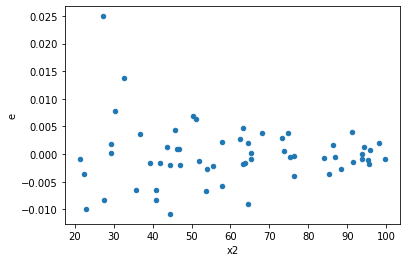

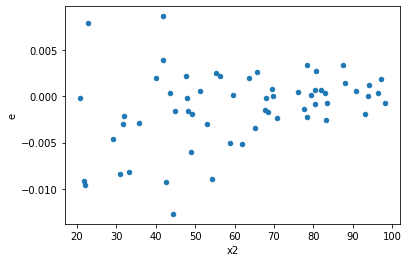

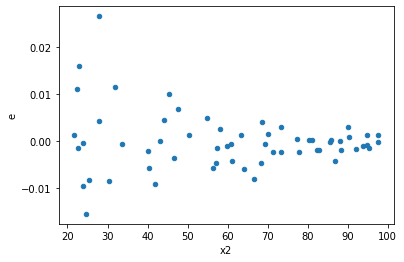

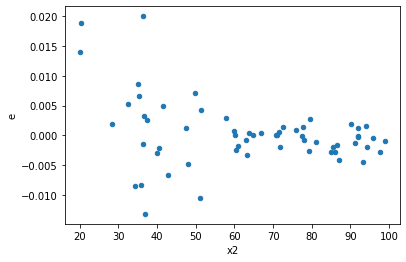

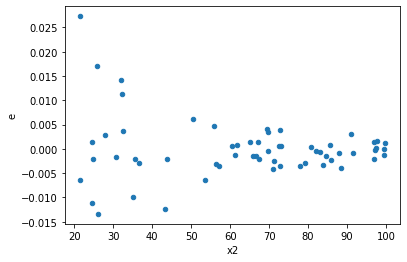

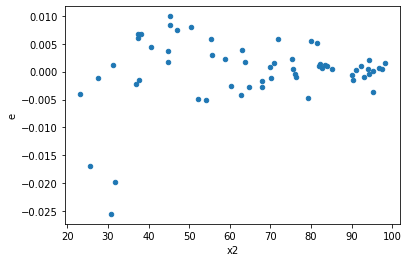

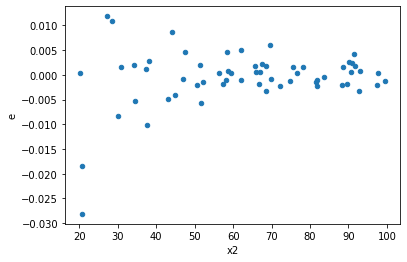

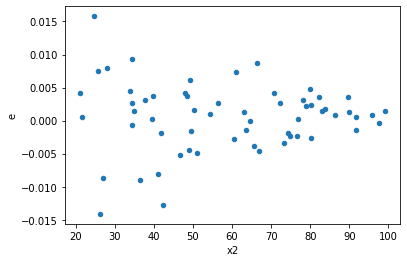

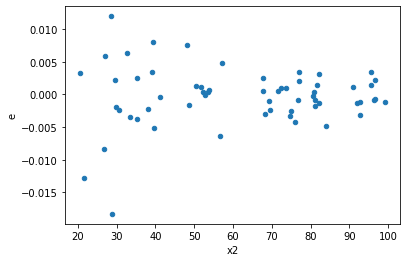

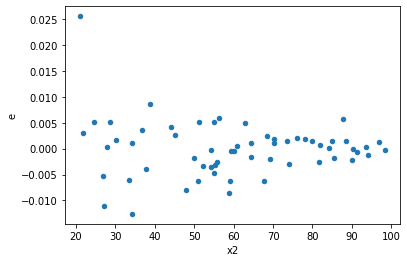

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.000779017753033253,7.626688630879761e-05,3.5409897865147865e-05,3.4666766503998914e-06,0.09790134565205742,8.544866957369944e-07,Reject005=0 : Heteroscedasticity
1.0,22.0,22.0,0.001335425295651179,7.525799195174248e-05,6.070114980232632e-05,3.4208178159882946e-06,0.0563550744446886,4.260157929296238e-09,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,0.0010892209016207524,5.7400714017097034e-05,4.951004098276147e-05,2.6091233644135013e-06,0.05269887304924576,2.1839087118413102e-09,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,0.0017892609250569275,0.0001260337633898718,8.133004204804215e-05,5.728807426812354e-06,0.07043900731575072,3.798342699057225e-08,Reject005=0 : Heteroscedasticity
4.0,22.0,22.0,0.0006015550676504613,9.33677894428806e-05,2.734341216593006e-05,4.243990429221846e-06,0.15521071048001336,4.913035990841843e-05,Reject005=0 : Heteroscedasticity
5.0,22.0,22.0,0.0006268196892777031,0.00018551522015148128,2.8491804058077412e-05,8.432510006885512e-06,0.2959626561272416,0.006080063221716778,Reject005=0 : Heteroscedasticity
6.0,22.0,22.0,0.0007549106839251696,9.480905115924316e-05,3.431412199659862e-05,4.3095023254201434e-06,0.1255897593954851,8.035813559275756e-06,Reject005=0 : Heteroscedasticity
7.0,22.0,22.0,0.0010480930195766144,6.398663828649997e-05,4.7640591798937015e-05,2.9084835584772714e-06,0.061050533770702804,9.398372786617689e-09,Reject005=0 : Heteroscedasticity
8.0,22.0,22.0,0.0009387818616472757,9.88558657976728e-05,4.2671902802148894e-05,4.493448445348764e-06,0.10530227503992347,1.6649653986826308e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    999
Reject005=1 : Homoscedasticity        1
Name: Result_test, dtype: int64